In [1]:
import pandas as pd
import numpy as np 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv')
df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

rotten_tomatoes_link - 0.0%
movie_title - 0.0%
movie_info - 2.0%
critics_consensus - 48.0%
content_rating - 0.0%
genres - 0.0%
directors - 1.0%
authors - 9.0%
actors - 2.0%
original_release_date - 7.0%
streaming_release_date - 2.0%
runtime - 2.0%
production_company - 3.0%
tomatometer_status - 0.0%
tomatometer_rating - 0.0%
tomatometer_count - 0.0%
audience_status - 3.0%
audience_rating - 2.0%
audience_count - 2.0%
tomatometer_top_critics_count - 0.0%
tomatometer_fresh_critics_count - 0.0%
tomatometer_rotten_critics_count - 0.0%


In [6]:
cols_to_drop = ['critics_consensus', 'movie_info','directors', 'authors', 'actors', 'streaming_release_date','runtime', 'production_company', 'tomatometer_count', 
                'audience_status', 'tomatometer_rating', 'audience_count', 'tomatometer_top_critics_count','genres','audience_rating','original_release_date', 'rotten_tomatoes_link' ,'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
df_dropped_colums = df.drop(cols_to_drop, axis=1)
df_dropped_colums.head()

,movie_title,content_rating,tomatometer_status
0,Percy Jackson & the Olympians: The Lightning T...,PG,Rotten
1,Please Give,R,Certified-Fresh
2,10,R,Fresh
3,12 Angry Men (Twelve Angry Men),NR,Certified-Fresh
4,"20,000 Leagues Under The Sea",G,Fresh


In [7]:
df_dropped_colums.set_index('movie_title')

,content_rating,tomatometer_status
movie_title,,
Percy Jackson & the Olympians: The Lightning Thief,PG,Rotten
Please Give,R,Certified-Fresh
10,R,Fresh
12 Angry Men (Twelve Angry Men),NR,Certified-Fresh
"20,000 Leagues Under The Sea",G,Fresh
...,...,...
Zoot Suit,R,Rotten
Zootopia,PG,Certified-Fresh
Zorba the Greek,NR,Fresh


In [8]:
for col in df_dropped_colums.columns:
    pct_missing = np.mean(df_dropped_colums[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

movie_title - 0.0%
content_rating - 0.0%
tomatometer_status - 0.0%


In [9]:
df_dropped_colums= df_dropped_colums.sort_values("tomatometer_status", ascending=True).set_index('movie_title')


In [10]:
df_dropped_colums.dropna()

,content_rating,tomatometer_status
movie_title,,
Red,PG-13,Certified-Fresh
Tully,R,Certified-Fresh
Contempt,PG,Certified-Fresh
Tully,R,Certified-Fresh
No End in Sight,NR,Certified-Fresh
...,...,...
"I, Robot",PG-13,Rotten
I Saw the Light,R,Rotten
I Smile Back,R,Rotten


In [11]:
df_dropped_colums.replace({'G': 0, 'PG': 1, 'PG-13': 2, 'NC17': 3, 'NR': 4, 'R': 5})

,content_rating,tomatometer_status
movie_title,,
Red,2,Certified-Fresh
Tully,5,Certified-Fresh
Contempt,1,Certified-Fresh
Tully,5,Certified-Fresh
No End in Sight,4,Certified-Fresh
...,...,...
We Are the Heat,4,NaN
What We Found,4,NaN
"The World, the Flesh and the Devil",4,NaN


In [12]:
df_dropped_colums['movie_count'] = 1

In [13]:
df_cor = df_dropped_colums.groupby(['content_rating', 'tomatometer_status']).count()
df_cor

movie_count
content_rating tomatometer_status             
G              Certified-Fresh             136
               Fresh                       343
               Rotten                      197
NC17           Certified-Fresh               8
               Fresh                        19
               Rotten                       11
NR             Certified-Fresh             700
               Fresh                      3398
               Rotten                     1349
PG             Certified-Fresh             425
               Fresh                       766
               Rotten                      974
PG-13          Certified-Fresh             597
               Fresh                       619
               Rotten                     1761
R              Certified-Fresh            1393
               Fresh                      1699
               Rotten                     3273

In [14]:
df_dropped_colums.groupby('tomatometer_status').count()

,content_rating,movie_count
tomatometer_status,,
Certified-Fresh,3259,3259
Fresh,6844,6844
Rotten,7565,7565


In [15]:
df_dropped_colums['content_rating'].value_counts()

R        6377
NR       5474
PG-13    2979
PG       2168
G         676
NC17       38
Name: content_rating, dtype: int64

In [16]:
df_dropped_colums.head()

,content_rating,tomatometer_status,movie_count
movie_title,,,
Red,PG-13,Certified-Fresh,1
Tully,R,Certified-Fresh,1
Contempt,PG,Certified-Fresh,1
Tully,R,Certified-Fresh,1
No End in Sight,NR,Certified-Fresh,1


In [17]:
#content_rating compare to tomatometer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
df_cor = df_cor.reset_index()

In [19]:
df_cor

,content_rating,tomatometer_status,movie_count
0,G,Certified-Fresh,136
1,G,Fresh,343
2,G,Rotten,197
3,NC17,Certified-Fresh,8
4,NC17,Fresh,19
5,NC17,Rotten,11
6,NR,Certified-Fresh,700
7,NR,Fresh,3398
8,NR,Rotten,1349
9,PG,Certified-Fresh,425


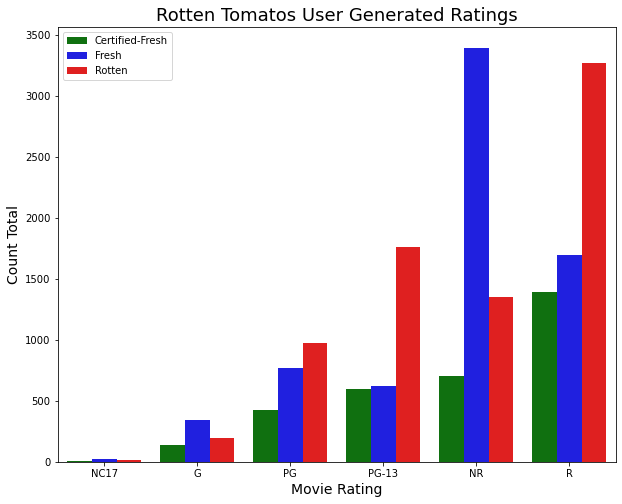

In [22]:


plt.figure(figsize=(10, 8))
sns.barplot(x='content_rating', 
            y='movie_count', 
            hue='tomatometer_status',
            order=["NC17","G","PG","PG-13",'NR', 'R'],
            data=df_cor, palette=['green', 'blue', 'red'])
plt.ylabel("Count Total", size=14)
plt.xlabel("Movie Rating", size=14)
plt.title("Rotten Tomatos User Generated Ratings", size=18)
plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
plt.legend()

In [21]:
#plot_one_fig, plot_one_ax = plt.subplots(figsize=(15,6))

# passing in our x and y data into .plot function
#plot_one_ax.bar(rates.index, rates)

# Add labels for x and y axes
#plot_one_ax.set_xlabel('Ratings', fontsize=15)
#plot_one_ax.set_ylabel('Count of Rating', fontsize=15)

# Add a title for the plot
#plot_one_ax.set_title('Count of Each Rating', fontsize=30)